## This file includes assignemnts one to three of week three  for ML at CCE
# Done by Hamed Shariffar
#### Codes from internet have been adopted and modifed to sereve the tasks
#### In comments HD means coment of HameD. In other words, that indicates my personal notes

In [ ]:
from datetime import datetime, timedelta,date
import numpy as np   # import numpy
import pandas as pd  # import pandas
import os
import gc   # for gabage collection
import seaborn as sns  # data visualization lib
import matplotlib.pyplot as plt
import glob 
%matplotlib inline

### 1.1.1 load main table: the main table is the file which contains target variable, in airbnb data set, it is train_users_2.csv

Airbnb project contains multiple csv files, but we only need to use train_users_2.csv and session.csv to build models. DO we really need the rest files?

In [119]:
#define your data path or specify your path, please modify your path accordingly on your own system
DATA_PATH = r'C:\Users\Hamed\OneDrive - Concordia University - Canada\1260\Class_Materials\project_data\hotel_booking\new-user-bookings'
file_name = os.path.join(DATA_PATH,'train_users_2.csv')
print(file_name)

C:\Users\Hamed\OneDrive - Concordia University - Canada\1260\Class_Materials\project_data\hotel_booking\new-user-bookings\train_users_2.csv


In [19]:
#you can also get the full path of your target file by
file_name = DATA_PATH+r'\train_users_2.csv'
print(file_name)

C:\Users\Hamed\OneDrive - Concordia University - Canada\1260\Class_Materials\project_data\hotel_booking\new-user-bookings\train_users_2.csv


In [20]:
train_df = pd.read_csv(file_name) # this is main table for airbnb data set
print(train_df.shape)
train_df.head()

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### 1.1.2 load session.csv

In [21]:
file_name = os.path.join(DATA_PATH,'sessions.csv')
session_df = pd.read_csv(file_name)  # read into RAM once
print(session_df.shape)

(10567737, 6)


In [22]:
session_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


### 1.1.4 check your memory usage if you data is big

In [23]:
# e.g., I want to check how much momery session_df takes
mem_use = session_df.memory_usage().sum() / 1024**2  # convert bytes to MB by dividing 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(mem_use))

Memory usage of dataframe is 483.75 MB


#### Assignment 1: write python function to read your own data set

In terms of the sample code, please write a python function called 'load_data' to read out all of your files

e.g., 

def load_data(path):
    # your code
    
    return df

In [120]:
def load_train_df(path): # the function to load train_users_2 when we give it the path where the file is
    file_name = path+r'\train_users_2.csv'
    train_df = pd.read_csv(file_name) # this is main table for airbnb data set
    return train_df

def load_session_dff(path): # the function to load sessions when we give it the path where the file is
    file_name = path+r'\sessions.csv'
    session_df = pd.read_csv(file_name) # this is main table for airbnb data set
    return session_df
path = DATA_PATH # we defined the DATA_PATH: the path of the files on my machine earlier


train_df = load_train_df(path)# we called the function to read train_users_2.csv
session_dff = load_session_dff(path)# we called the function to read session.csv
train_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [121]:
session_dff.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


Assignment 2:
Write a function to Check all of data types in your own project data set for all columns, and print them

try to reduce memory usage as much as you can for all applicable cols.

calculate memory usage before and after operation for your data set

#### Assignment 2: 

1. Write a function to Check all of data types in your own project data set for all columns, and print them

2. try to reduce memory usage as much as you can for all applicable cols. 

3. calculate memory usage before and after operation for your data set

In [38]:
def load_train_df(path): # the function to load train_users_2 when we give it the path where the file is
    file_name = path+r'\train_users_2.csv'
    train_df = pd.read_csv(file_name) # this is main table for airbnb data set
    return train_df

def load_session_dff(path): # the function to load sessions when we give it the path where the file is
    file_name = path+r'\sessions.csv'
    session_df = pd.read_csv(file_name) # this is main table for airbnb data set
    return session_df

def load_age_gender_bkts_dff(path): # the function to load sessions when we give it the path where the file is
    file_name = path+r'\age_gender_bkts.csv'
    age_gender_bkts_df = pd.read_csv(file_name) # this is main table for airbnb data set
    return age_gender_bkts_df

def load_countries_dff(path): # the function to load sessions when we give it the path where the file is
    file_name = path+r'\countries.csv'
    countries_dff = pd.read_csv(file_name) # this is main table for airbnb data set
    return countries_dff




In [39]:
def check_data(df):#function to Check all of data types in t data set for all columns, and print them
    #df = pd.read_csv(file_name)
    print('the number of rwos are ',df.shape[0],' and the number of columns are ', df.shape[1])
    # check car3, we see it is float64!!, but it is really need 64bit?
    for f in df.columns.values:
        print(' the column '+f+'\'s type is',df[f].dtype)
        print(' the column '+f+'\'s has unique values: ',df[f].nunique())
    #let us check max and min of this 'card3' column 
        if df[f].dtype!= 'object':
            print(' the column '+f+'\'s max is',df[f].max()) 
            print(' the column '+f+'\'s min is',df[f].min())
            
    return

#check_data(df)

In [40]:


path = DATA_PATH # we defined the DATA_PATH: the path of the files on my machine earlier


train_df = load_train_df(path)# we called the function to read train_users_2.csv
session_dff = load_session_dff(path)# we called the function to read session.csv
countries_dff = load_countries_dff(path) #we called the function to read countries.csv
age_gender_bkts_dff = load_age_gender_bkts_dff(path)#we called the function to read age_gender_bkts.csv
#train_df.head()
print('/////////////////////age_gender_bkts_dff/////////////////////////////////////')
check_data(age_gender_bkts_dff)
print('//////////////////////countries_dff////////////////////////////////////')
check_data(countries_dff)
print('////////////////////////session_dff//////////////////////////////////')
check_data(session_dff)
print('/////////////////////////train_df/////////////////////////////////')
check_data(train_df)

/////////////////////age_gender_bkts_dff/////////////////////////////////////
the number of rwos are  420  and the number of columns are  5
 the column age_bucket's type is object
 the column age_bucket's has unique values:  21
 the column country_destination's type is object
 the column country_destination's has unique values:  10
 the column gender's type is object
 the column gender's has unique values:  2
 the column population_in_thousands's type is float64
 the column population_in_thousands's has unique values:  381
 the column population_in_thousands's max is 11601.0
 the column population_in_thousands's min is 0.0
 the column year's type is float64
 the column year's has unique values:  1
 the column year's max is 2015.0
 the column year's min is 2015.0
//////////////////////countries_dff////////////////////////////////////
the number of rwos are  10  and the number of columns are  7
 the column country_destination's type is object
 the column country_destination's has unique 

In [41]:
#let us check the range of float 64,32 or 16 in python
np.finfo(np.float64).max,np.finfo(np.float64).min,np.finfo(np.float32).max,np.finfo(np.float32).min,np.finfo(np.float16).max,np.finfo(np.float16).min


(1.7976931348623157e+308,
 -1.7976931348623157e+308,
 3.4028235e+38,
 -3.4028235e+38,
 65500.0,
 -65500.0)

In [42]:
#let us check the range of int 64,32 or 16 in python
#np.finfo(int64).max,np.finfo(int64).min,np.finfo(np.int32).max,np.finfo(np.int32).min,np.finfo(np.int16).max,np.finfo(np.int16).min


In [43]:
print('/////////////////////////train_df/////////////////////////////////')
check_data(train_df)

/////////////////////////train_df/////////////////////////////////
the number of rwos are  213451  and the number of columns are  16
 the column id's type is object
 the column id's has unique values:  213451
 the column date_account_created's type is object
 the column date_account_created's has unique values:  1634
 the column timestamp_first_active's type is int64
 the column timestamp_first_active's has unique values:  213451
 the column timestamp_first_active's max is 20140630235824
 the column timestamp_first_active's min is 20090319043255
 the column date_first_booking's type is object
 the column date_first_booking's has unique values:  1976
 the column gender's type is object
 the column gender's has unique values:  4
 the column age's type is float64
 the column age's has unique values:  127
 the column age's max is 2014.0
 the column age's min is 1.0
 the column signup_method's type is object
 the column signup_method's has unique values:  3
 the column signup_flow's type is

In [44]:
train_df['age'].unique()

array([      nan, 3.800e+01, 5.600e+01, 4.200e+01, 4.100e+01, 4.600e+01,
       4.700e+01, 5.000e+01, 3.600e+01, 3.700e+01, 3.300e+01, 3.100e+01,
       2.900e+01, 3.000e+01, 4.000e+01, 2.600e+01, 3.200e+01, 3.500e+01,
       5.900e+01, 4.900e+01, 4.400e+01, 3.400e+01, 2.800e+01, 1.900e+01,
       5.300e+01, 5.200e+01, 3.900e+01, 5.700e+01, 2.500e+01, 5.400e+01,
       6.900e+01, 6.300e+01, 4.300e+01, 5.500e+01, 6.500e+01, 5.800e+01,
       6.100e+01, 1.800e+01, 5.000e+00, 2.700e+01, 4.500e+01, 6.000e+01,
       4.800e+01, 5.100e+01, 6.400e+01, 7.200e+01, 7.000e+01, 6.700e+01,
       7.300e+01, 2.014e+03, 1.040e+02, 6.600e+01, 1.050e+02, 6.800e+01,
       9.500e+01, 2.400e+01, 9.400e+01, 7.500e+01, 7.900e+01, 6.200e+01,
       2.013e+03, 1.600e+01, 4.000e+00, 2.300e+01, 1.010e+02, 9.800e+01,
       7.600e+01, 7.400e+01, 8.700e+01, 9.200e+01, 1.150e+02, 7.100e+01,
       8.400e+01, 1.070e+02, 7.800e+01, 9.900e+01, 1.100e+02, 1.020e+02,
       8.200e+01, 7.700e+01, 2.200e+01, 8.900e+01, 

In [45]:
#convert age into float16, by doing this, we reduce some space usaged for col 'age'
train_df['age'] = train_df['age'].astype(np.float16)
#train_df['gender'].dtype # now it is forced to be float16
# now let us check the memory usage now, you will notice the momery decreases. You can imagine if there are millions of 
# data sample with many columns, this operation will reduce much RAM
train_df['age'].dtype

dtype('float16')

In [46]:
#convert card3 into float16, by doing this, we reduce some space usaged for col 'card3'
train_df['signup_flow'] = train_df['signup_flow'].astype(np.int16)
train_df['signup_flow'].dtype # now it is forced to be int16


dtype('int16')

In [47]:
mem_use = train_df.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.6f} MB'.format(mem_use))

Memory usage of dataframe is 23.613400 MB


In [48]:
train_df2 = load_train_df(path)# we called the function to read train_users_2.csv

In [49]:
mem_use = train_df2.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.6f} MB'.format(mem_use))


Memory usage of dataframe is 26.056152 MB


#### Assignment 3: 

1. Check your own project to find all cols with missing values
2. Analyze them and make decision how to fill missing values
3. Fill missing values

In [23]:
DATA_PATH = r'C:\Users\Hamed\OneDrive - Concordia University - Canada\1260\Class_Materials\project_data\hotel_booking\new-user-bookings'
# load DATA_PATH WITH THE ADDRESS OF THE DATA SET ON MY MACHINE
DATA_PATH

'C:\\Users\\Hamed\\OneDrive - Concordia University - Canada\\1260\\Class_Materials\\project_data\\hotel_booking\\new-user-bookings'

In [24]:
file_name = os.path.join(DATA_PATH,'train_users_2.csv')# HD:CREATE THE FULL ADDRESS OF THE DATASET ON THE MACHINE
train_df = pd.read_csv(file_name)#HD: LOAD ONE OF THE MAIN DATA SETS TO A DATA FRAME
train_df.shape# HD: SHOW THE NUMBER OF ROWS AND COLUMN OF THE DATFRAME


(213451, 16)

In [25]:
train_df.head()#HD: SHOW ME THE HEADER OF THE LOADED DATA

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [26]:
# get info of missing data for each col by creading data frame that contains col's name and its NaN value counts
nan_info = train_df.isnull()# Create a Dataframe sameas the "train_df' with where the item says if there was a NaN it in there
nan_info

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
213447,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
213448,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
213449,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False


In [27]:
nan_info2 = train_df.isnull().sum() # Create a panda serries where index is the(train_df.isnull()) nan_info's columns and thevalue is the sum of each columns content which is the number of True
nan_info2

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [28]:
type(nan_info2)

pandas.core.series.Series

In [29]:
nan_info3 = pd.DataFrame(nan_info2)## Create a panda data frame out of the data series
nan_info3 # the index is the same as dataseries

,0
id,0
date_account_created,0
timestamp_first_active,0
date_first_booking,124543
gender,0
age,87990
signup_method,0
signup_flow,0
language,0
affiliate_channel,0


In [30]:
nan_info3.reset_index(inplace = True)# HD:we reset the index t create a new column that holds the last index(column names)
#and have a new consequtive series of integer as index
nan_info3

,index,0
0,id,0
1,date_account_created,0
2,timestamp_first_active,0
3,date_first_booking,124543
4,gender,0
5,age,87990
6,signup_method,0
7,signup_flow,0
8,language,0
9,affiliate_channel,0


In [31]:
nan_info3.columns = ['col','nan_cnt'] # now we change the columns' name
nan_info3

,col,nan_cnt
0,id,0
1,date_account_created,0
2,timestamp_first_active,0
3,date_first_booking,124543
4,gender,0
5,age,87990
6,signup_method,0
7,signup_flow,0
8,language,0
9,affiliate_channel,0


In [32]:
nan_info3.sort_values(by = 'nan_cnt',ascending=False,inplace=True)# we sort the dataframe according to values of the column 'nan_cnt'
nan_info3

,col,nan_cnt
3,date_first_booking,124543
5,age,87990
11,first_affiliate_tracked,6065
0,id,0
1,date_account_created,0
2,timestamp_first_active,0
4,gender,0
6,signup_method,0
7,signup_flow,0
8,language,0


In [33]:
nan_info3.reset_index(inplace=True) #HD: we reset the indexes
nan_info3

,index,col,nan_cnt
0,3,date_first_booking,124543
1,5,age,87990
2,11,first_affiliate_tracked,6065
3,0,id,0
4,1,date_account_created,0
5,2,timestamp_first_active,0
6,4,gender,0
7,6,signup_method,0
8,7,signup_flow,0
9,8,language,0


In [34]:
# get all cols with missing data
nan_info4 = nan_info3.loc[nan_info3.nan_cnt>0] #HD- the out put will be a data frame since there
# are more rows where nan_info3.nan_cnt>0
nan_info4

,index,col,nan_cnt
0,3,date_first_booking,124543
1,5,age,87990
2,11,first_affiliate_tracked,6065


In [35]:
# get all cols with missing data
cols_with_missing = nan_info4.col.values# create an numpy.array
cols_with_missing

array(['date_first_booking', 'age', 'first_affiliate_tracked'],
      dtype=object)

In [36]:
type(cols_with_missing)

numpy.ndarray

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [38]:
train_df['age'] = train_df['age'].fillna(0)# HD: set all the nan values to zero

In [39]:
train_df.age.isnull().sum()# HD: Count how many nan is there in train_df.age


0

In [41]:
# number of non zero agers:nnza
nnza = train_df.age.astype(bool).sum()
nnza


125461

In [42]:
mask = train_df.age > 75 # mask ages over 75 with zero
column_name = 'age'
train_df.loc[mask, column_name] = 0
# number of non zero agers greater than 75 
a = train_df.age.astype(bool).sum()
nnza75 = nnza - a
nnza75

3057

In [43]:
mask = train_df.age <18  # mask ages smallr than 18 with zero
column_name = 'age'
train_df.loc[mask, column_name] = 0
# number of non zero agers less than 18
b = train_df.age.astype(bool).sum()
nnza18 = a - b
nnza18

158

In [46]:
# number of non zero agers between  18 and 75
nnza18_75 = train_df.age.astype(bool).sum()
nnza18_75

122246

In [50]:
# average age for those between 17 and 75
av_age = round (train_df.age.sum()/ nnza18_75)
av_age

36.0

In [51]:
 # replacing all zeros in column age with  av_age
train_df.age = train_df.age.replace(0, av_age)

In [53]:
# number of non zero agers:nnza
nnza2 = train_df.age.astype(bool).sum()
nnza2

213451

In [54]:
train_df.age.isnull().sum()# HD: Count how many nan is there in train_df.age

0

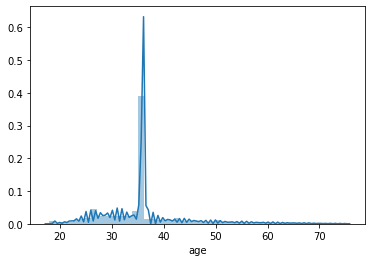

In [57]:
sns.distplot(train_df['age'])# plot the column 'age' to check the distribution

In [56]:
train_df['age'].mean(),train_df['age'].median(),train_df['age'].std()

(36.16785116958928, 36.0, 8.398501307549612)

It seems that replacing of the not acceptable and nan values with 36 had a sever effect of the min

In [58]:
train_df.date_first_booking#HD: check the column 'date_first_booking'

0                NaN
1                NaN
2         2010-08-02
3         2012-09-08
4         2010-02-18
             ...    
213446           NaN
213447           NaN
213448           NaN
213449           NaN
213450           NaN
Name: date_first_booking, Length: 213451, dtype: object

In [60]:
train_df.date_first_booking.dtype #HD: check the type of dat in column 'date_first_booking'

dtype('O')

In [78]:
date_first_booking = train_df.date_first_booking.dropna()# make a panda series, date_first_booking, 
#out of train_df.date_first_booking witout the nan values
date_first_booking = date_first_booking.reset_index(inplace=False) # reset the indes of date_first_booking and make it data frame
date_first_booking.drop(['index'], axis=1, inplace=False) # drop the column index

,date_first_booking
0,2010-08-02
1,2012-09-08
2,2010-02-18
3,2010-01-02
4,2010-01-05
...,...
88903,2014-06-30
88904,2015-03-16
88905,2014-08-13
88906,2014-07-13


In [79]:
type(date_first_booking)

pandas.core.frame.DataFrame

In [81]:


#convert date field from string to datetime
date_first_booking = pd.to_datetime(date_first_booking. date_first_booking)# HD:convert the type of the column
#HD: the input of pd.to_datetime must be pandas series like a column of a datafram and the output is a series as well

In [82]:
date_first_booking

0       2010-08-02
1       2012-09-08
2       2010-02-18
3       2010-01-02
4       2010-01-05
           ...    
88903   2014-06-30
88904   2015-03-16
88905   2014-08-13
88906   2014-07-13
88907   2014-07-02
Name: date_first_booking, Length: 88908, dtype: datetime64[ns]

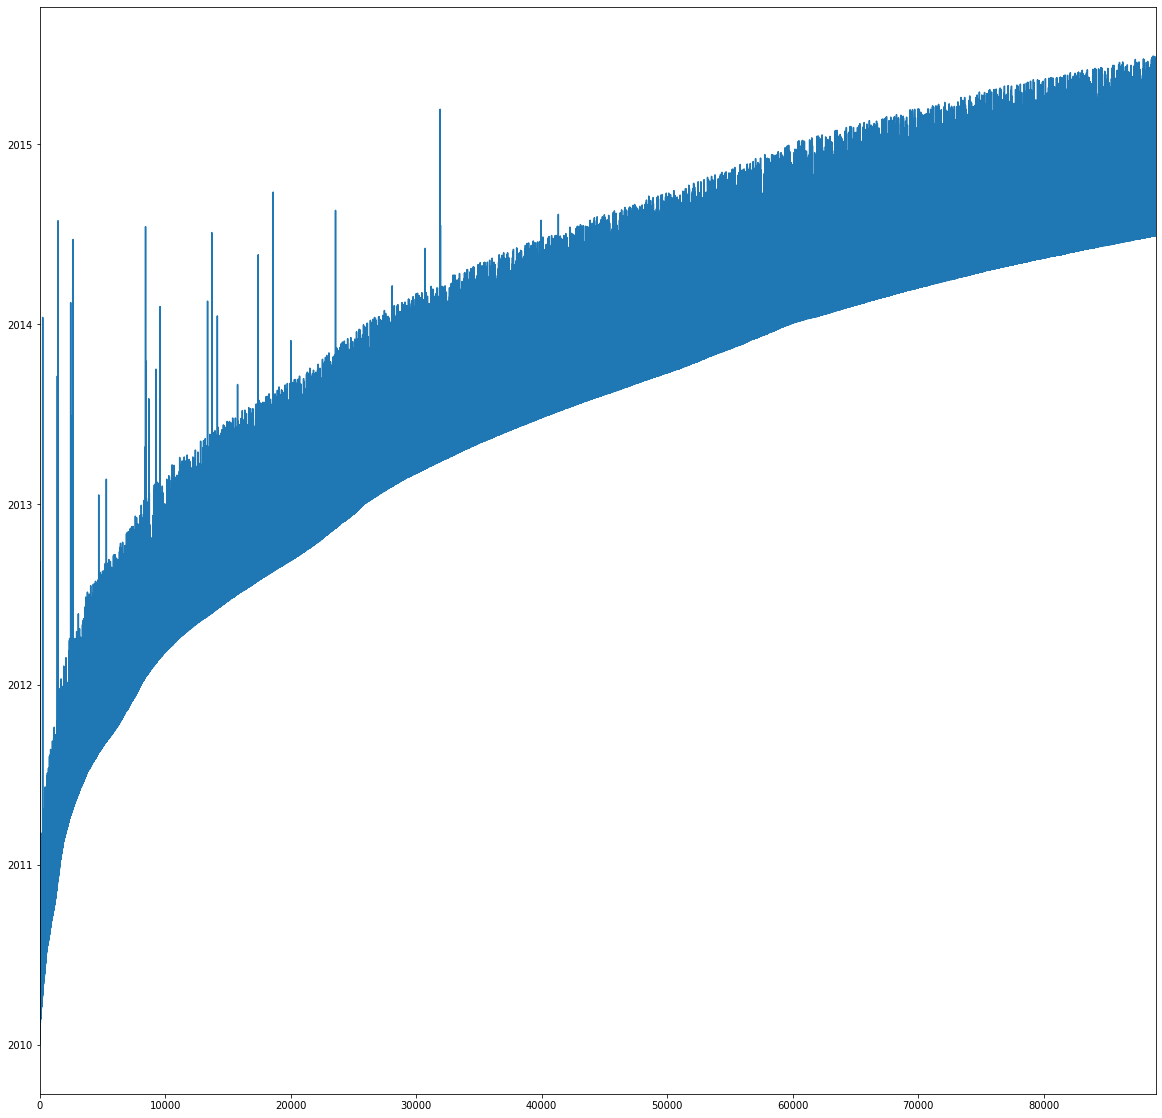

In [89]:
date_first_booking.plot(figsize = (20,20)) 
plt.show() 

Afterplotting the series we see that the dates are not in one-way order


In [92]:
train_df.date_first_booking.describe()

count          88908
unique          1976
top       2014-05-22
freq             248
Name: date_first_booking, dtype: object

In [93]:
train_df.date_first_booking.isnull().sum() #  the number of nan values in the column ' date_first_booking,'

124543

The number of nan value in the column 'date_first_booking' is 213451, while the total number is 213451.
That means we dont have data foe more than 50 percesnt of this column.
We will replace NaNs by preceding values in pandas DataFrame, but we may decide to remove the whole column later.

In [95]:
len(train_df)# the total length of the data frame

213451

In [100]:
train_df.date_first_booking.fillna(method='ffill', inplace = True)#We will replace NaNs by preceding values in pandas DataFrame
train_df.date_first_booking.fillna(method='bfill', inplace = True)# to fill the very beginin gap
#method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
#Method to use for filling holes in reindexed Series pad / ffill: 
#propagate last valid observation forward to next valid backfill / bfill: use next valid observation to fill gap.

0         2010-08-02
1         2010-08-02
2         2010-08-02
3         2012-09-08
4         2010-02-18
             ...    
213446    2014-07-02
213447    2014-07-02
213448    2014-07-02
213449    2014-07-02
213450    2014-07-02
Name: date_first_booking, Length: 213451, dtype: object

In [105]:
train_df. date_first_booking = pd.to_datetime(train_df. date_first_booking)# HD:convert the type of the column
#HD: the input of pd.to_datetime must be pandas series like a column of a datafram and the output is a series as well

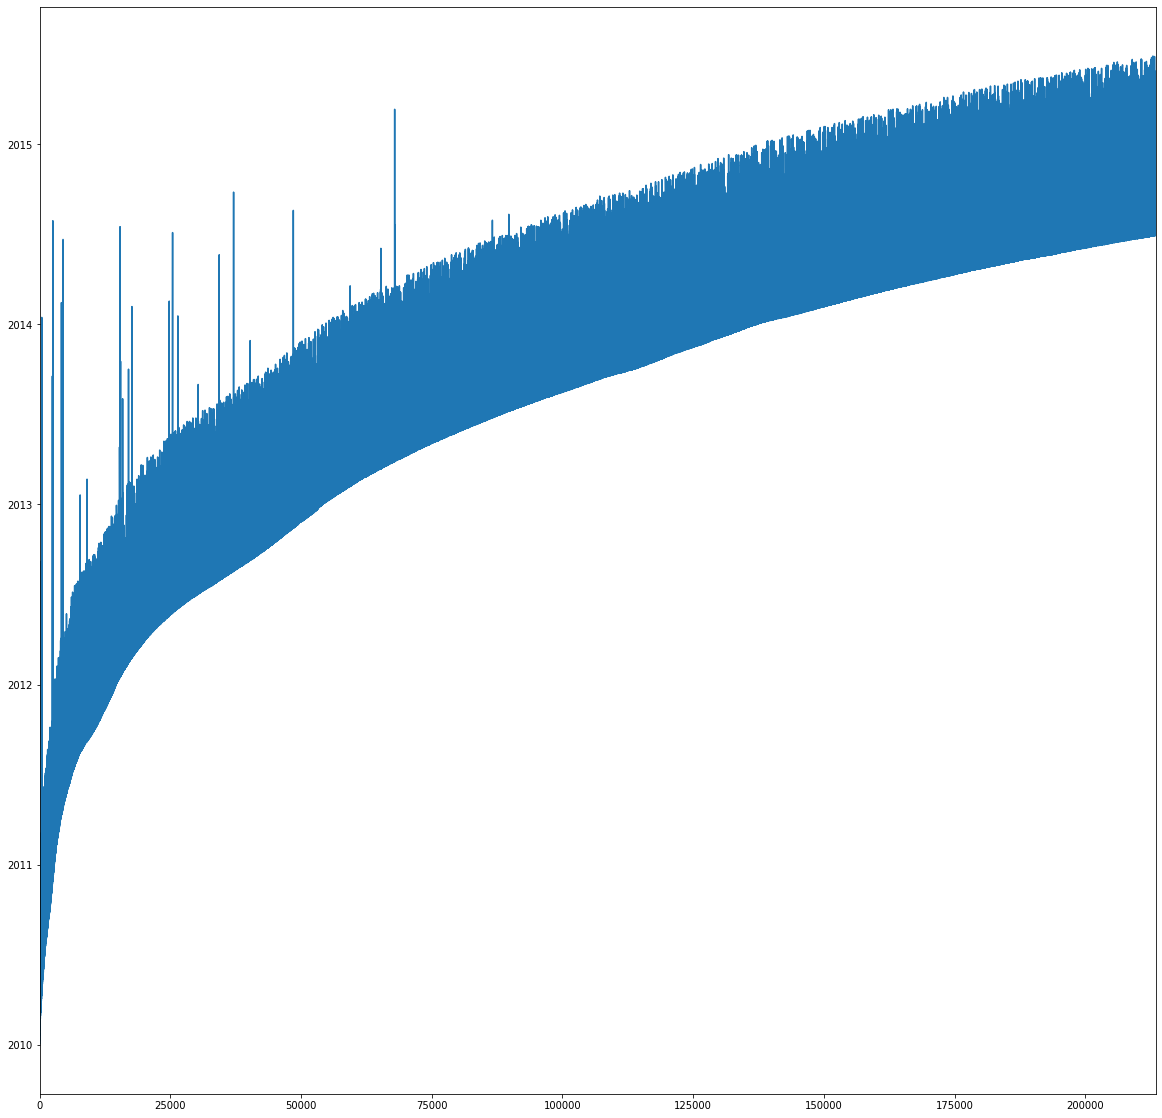

In [106]:
train_df. date_first_booking.plot(figsize = (20,20)) 
plt.show() 

In [108]:
train_df. date_first_booking.mean()

Timestamp('2013-08-09 18:01:28.544836608')

In [110]:
train_df. date_first_booking.isnull().sum()# we have filled allthe null in the column' date_first_booking' 

0

At this point ther is only  the column 'first_affiliate_tracked'  that has some NAN values:
1. we see what is it's type
2. how many NAN there are
3. we replace the NAN with "undefined"

In [111]:
train_df.first_affiliate_tracked.dtype

dtype('O')

In [112]:
train_df.first_affiliate_tracked.isnull().sum()# we check how many NaN we have 

6065

In [113]:
train_df.first_affiliate_tracked

0             untracked
1             untracked
2             untracked
3             untracked
4             untracked
              ...      
213446              omg
213447           linked
213448        untracked
213449    tracked-other
213450        untracked
Name: first_affiliate_tracked, Length: 213451, dtype: object

In [114]:
train_df.first_affiliate_tracked.fillna('undefined', inplace = True)#we replace the NAN with "undefined"

In [115]:
train_df.first_affiliate_tracked.isnull().sum()# we check how many NaN we have 

0